## Indigenous terms in Library of Congress Subject Headings by year

In [1]:
%matplotlib notebook

import os
import ndjson
from datetime import datetime
from collections import Counter
from pandas import DataFrame
import matplotlib.pyplot as plt

### load hand-selected dataset of id's of LOC subject headings specifically related to Indigeneity, as well as the entire set of LOC subject headings downloaded from their data portal: https://www.loc.gov/aba/publications/FreeLCSH/freelcsh.html

NOTE: terms affiliated with specific tribes were avoided, both because our RQ deals with US federal archival practices of indigenous artifacts in general, and because it would have taken too long to confirm that each tribe was in fact located within US borders and therefore relevant for this inquiry. In the end a dataset of 763 terms was curated, of which about 655 had created dates associated with them

In [2]:
indigenous_ids = os.path.join('input', 'indigenous_term_identifiers.txt')
with open(indigenous_ids, 'r') as ids:
    indids = ids.readlines()

# load id's of LOC subject headings specifically related to whiteness
# white_ids = os.path.join('input', 'white_identifiers.txt')
# with open(white_ids, 'r') as ids:
#     whidids = ids.readlines()
# ## These are unused as there are only 61 of them

# load LOC subject headings
subject_headings_infile = os.path.join('input', 'lcsh.skos.ndjson')
with open(subject_headings_infile, 'r') as inf:
    skos = ndjson.load(inf)

In [27]:
# number of indigenous related subject terms
len(indids)

763

In [28]:
# example of the hash_id of one of the subject headings
indids[0]

'sh85065665\n'

In [29]:
# number of subject headings in entire LOC
len(skos)

434265

In [6]:
# single record from the LOC subject headings SKOS represetation
skos[0]

{'@context': {'cs': 'http://purl.org/vocab/changeset/schema#',
  'rdf': 'http://www.w3.org/1999/02/22-rdf-syntax-ns#',
  'rdfs': 'http://www.w3.org/2000/01/rdf-schema#',
  'rdfs1': 'http://www.w3.org/1999/02/22-rdf-schema#',
  'skos': 'http://www.w3.org/2004/02/skos/core#',
  'skosxl': 'http://www.w3.org/2008/05/skos-xl#',
  'xsd': 'http://www.w3.org/2001/XMLSchema#',
  'about': 'http://id.loc.gov/authorities/subjects/sh2009116899'},
 '@graph': [{'@id': 'http://id.loc.gov/authorities/subjects/sh2009116899',
   '@type': 'skos:Concept',
   'skos:changeNote': [{'@id': '_:N4bc468bfb040444196abfe01db09e2c2'},
    {'@id': '_:N84d2f5a19189411c8ec0500588920d6e'}],
   'skos:editorial': '[Record generated for validation purposes.]',
   'skos:inScheme': {'@id': 'http://id.loc.gov/authorities/subjects'},
   'skos:prefLabel': {'@language': 'en',
    '@value': 'Bee culture--Juvenile literature'}},
  {'@id': '_:N4bc468bfb040444196abfe01db09e2c2',
   '@type': 'cs:ChangeSet',
   'cs:changeReason': 'rev

In [8]:
# construct a representation of an LOC heading including its label, hash_id, full_id, and created_at date
labels = {}
outliers = []
problems = []

for i in range(len(skos)):
    for piece in skos[i]['@graph']:
        if piece['@type'] == 'skos:Concept':
            # print(piece['skos:prefLabel']['@value'])
            try:
                if type(piece['skos:prefLabel']) == dict:
                    hash_id = piece['@id'].split('/')[-1]
                    labels[hash_id] = {} # use the hash id as primary identifier
                    labels[hash_id]['label'] = piece['skos:prefLabel']['@value']
                    labels[hash_id]['full_id'] = piece['@id']
                elif type(piece['skos:prefLabel']) == str:
                    label = piece['skos:prefLabel']
                    strex = piece
                elif type(piece['skos:prefLabel']) == list:
                    if type(piece['skos:prefLabel'][0]) == str:
                        label = piece['skos:prefLabel'][0]
                        listex = piece
                else:
                    outliers.append(piece)
            except KeyError:
                problems.append(piece)
        elif piece['@type'] == 'cs:ChangeSet' and piece['cs:changeReason'] == 'new':
            labels[hash_id]['created_at'] = piece['cs:createdDate']['@value']

In [23]:
# verifying our datastructure
i = 0
for key in labels:
    i += 1
    print('{}: {}'.format(key, labels[key]))
    if i > 10:
        break

sh2009116899: {'label': 'Bee culture--Juvenile literature', 'full_id': 'http://id.loc.gov/authorities/subjects/sh2009116899', 'created_at': '2009-06-02T00:00:00'}
sh2007101899: {'label': 'Baseball--Juvenile literature', 'full_id': 'http://id.loc.gov/authorities/subjects/sh2007101899', 'created_at': '2007-11-29T00:00:00'}
sh2010000899: {'label': 'Microorganisms--Behavior', 'full_id': 'http://id.loc.gov/authorities/subjects/sh2010000899', 'created_at': '2010-01-22T00:00:00'}
sh91005899: {'label': 'National Forest System Month', 'full_id': 'http://id.loc.gov/authorities/subjects/sh91005899', 'created_at': '1991-11-25T00:00:00'}
sh90004306: {'label': 'Special months', 'full_id': 'http://id.loc.gov/authorities/subjects/sh90004306'}
sh85065756: {'label': 'Indonesia--Languages', 'full_id': 'http://id.loc.gov/authorities/subjects/sh85065756'}
sh85080100: {'label': 'Malayan languages', 'full_id': 'http://id.loc.gov/authorities/subjects/sh85080100'}
sh98003899: {'label': 'Ormu language', 'full_i

In [30]:
# create record of indigenous subject headings and when they were added to the LOC
subject_years = {}

for indid in indids:
    indid = indid.strip()
    if indid in labels.keys():
        try:
            date_format = '%Y-%m-%dT%H:%M:%S'
            created_date = datetime.strptime(labels[indid]['created_at'], date_format)
            if created_date.year in subject_years.keys():
                subject_years[created_date.year].append(labels[indid]['label'])
            else:
                subject_years[created_date.year] = [labels[indid]['label']]
        except KeyError:
            continue

# sort created data structure by year
sorted_years = dict(sorted(subject_years.items()))

### Here we sort the number of indigenous related terms by year. Notable of course is the year 1986; perhaps this is the year that LOC subject headings were first digitized, and so they all have the same creation date.

In [15]:
count_by_year = {'year': [key for key in sorted_years.keys()], 'term_count': [len(sorted_years[key]) for key in sorted_years.keys()]}
df = DataFrame(count_by_year, columns=['year', 'term_count'])
df

,year,term_count
0,1986,204
1,1987,4
2,1988,10
3,1989,13
4,1990,6
5,1991,10
6,1992,9
7,1993,31
8,1994,17
9,1995,28


<IPython.core.display.Javascript object>


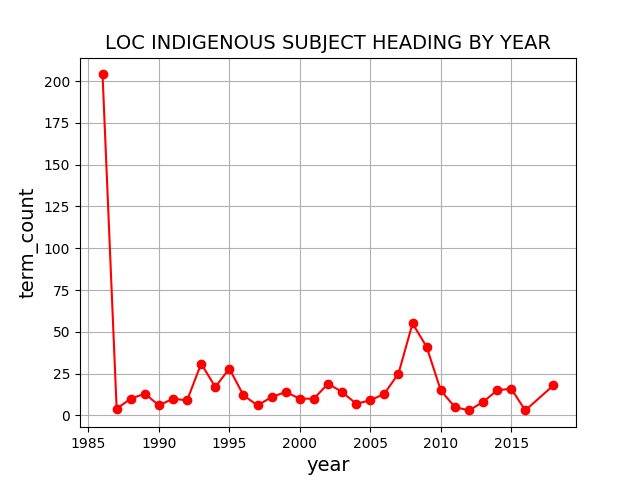

In [16]:
# plot the distribution of terms added per year
plt.plot(df['year'], df['term_count'], color='red', marker='o')
plt.title('LOC INDIGENOUS SUBJECT HEADING BY YEAR', fontsize=14)
plt.xlabel('year', fontsize=14)
plt.ylabel('term_count', fontsize=14)
plt.grid(True)
plt.show()

### here we can see the specific terms added by year, with a notable emphasis on the word "indigenous" in the last several years

In [21]:
for key in sorted_years.keys():
    print('- - - - {} - - - - -'.format(key))
    for term in sorted(sorted_years[key], key=str.lower):
        print(term)
    print()

- - - - 1986 - - - - -
American fiction--Indian authors
American poetry--Indian authors
Calumets
Civilization--Indian influences
Ethnology--North America
Ethnomathematics
Ethnozoology
Federal aid to Indians
Indian aesthetics
Indian agents
Indian architecture
Indian art--North America--Endowments
Indian art--North America--Exhibitions
Indian arts--North America
Indian astrology
Indian astronomy--North America
Indian baskets--North America
Indian business enterprises
Indian calendar
Indian calendar--North America
Indian captivities
Indian cartography
Indian children--North America
Indian chronology
Indian cooking
Indian councils
Indian dolls
Indian embroidery--North America
Indian ethics
Indian featherwork--North America
Indian goldwork--North America
Indian incantations
Indian literature--United States
Indian magic--North America
Indian masks--North America
Indian metal-work
Indian motorcycle
Indian newspapers
Indian numeration
Indian painting--North America
Indian periodicals
Indian ph